In [37]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt



In [38]:
df = pd.read_csv('C:\\Users\\guitz\\OneDrive\\Área de Trabalho\\pyquant\\pyquant\\csv\\prices_volume.csv',  encoding='utf-16', delimiter=',')
df.columns = [col.lower() for col in df.columns]
                        
if df.columns[0] == 'date':
    df['datetime'] = pd.to_datetime(df['date'].astype(str) + ' ' + df['time'].astype(str), format='%Y.%m.%d %H:%M')
    df.drop(columns=['date', 'time'], inplace=True)

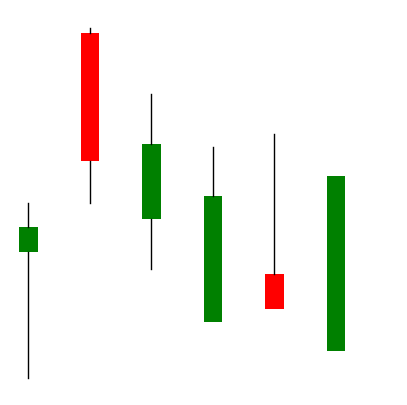

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def calculate_displacement_factors(ohlc_data):
    first_low = ohlc_data[0, 2]
    displacement_factors = (ohlc_data[:, 2] - first_low) / (ohlc_data[:, 2].max() - ohlc_data[:, 2].min())
    return displacement_factors

def normalize_ohlc(ohlc_data):
    normalized_data = np.zeros_like(ohlc_data)
    for i in range(len(ohlc_data)):
        high = ohlc_data[i, 1]
        low = ohlc_data[i, 2]
        price_range = high - low
        
        if price_range == 0:
            normalized_data[i] = ohlc_data[i]
        else:
            normalized_data[i, 0] = (ohlc_data[i, 0] - low) / price_range
            normalized_data[i, 1] = (ohlc_data[i, 1] - low) / price_range
            normalized_data[i, 2] = (ohlc_data[i, 2] - low) / price_range
            normalized_data[i, 3] = (ohlc_data[i, 3] - low) / price_range
    return normalized_data

def add_displacements(normalized_data, displacement_factors):
    candle_vectors = []
    for i in range(len(normalized_data)):
        open_price = normalized_data[i, 0]
        high_price = normalized_data[i, 1]
        low_price = normalized_data[i, 2]
        close_price = normalized_data[i, 3]
        
        displacement = displacement_factors[i]
        adjusted_open = open_price + displacement
        adjusted_close = close_price + displacement
        adjusted_high = high_price + displacement
        adjusted_low = low_price + displacement
        
        candle_vector = np.array([adjusted_open, adjusted_close, adjusted_high, adjusted_low])
        candle_vectors.append(candle_vector)
    
    return np.array(candle_vectors)

def plot_normalized_candlestick(ohlc_data):
    fig, ax = plt.subplots(figsize=(5, 5))
    
    width = 0.3
    spacing = 1
    
    displacement_factors = calculate_displacement_factors(ohlc_data)
    normalized_data = normalize_ohlc(ohlc_data)
    candle_vectors = add_displacements(normalized_data, displacement_factors)
    
    for i, candle_vector in enumerate(candle_vectors):
        open_price, close_price, high_price, low_price = candle_vector
    
        x = i * spacing
        lower_shadow_min = min(open_price, close_price)
        ax.plot([x, x], [low_price, lower_shadow_min], color='black', linewidth=1)
        
        upper_shadow_max = max(open_price, close_price)
        ax.plot([x, x], [upper_shadow_max, high_price], color='black', linewidth=1)
        
        color = 'green' if close_price >= open_price else 'red'
        
        if np.isclose(close_price, open_price):
            ax.axhline(y=close_price, color='black', linestyle='-', linewidth=1)
        else:
            rect = patches.Rectangle((x - width / 2, min(open_price, close_price)), width, abs(open_price - close_price), linewidth=0, edgecolor='white', facecolor=color)
            ax.add_patch(rect)
        

    margin = 0.1
    ax.set_xlim(-width, len(normalized_data) * spacing)
    ax.set_ylim(min([vec[3] for vec in candle_vectors]) - margin, max([vec[2] for vec in candle_vectors]) + margin) 
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks(np.linspace(min([vec[3] for vec in candle_vectors]) - margin, max([vec[2] for vec in candle_vectors]) + margin, 11))
    ax.set_yticklabels([])

    
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.yaxis.set_ticks_position('none')
    ax.set_facecolor('white')
    
    plt.show()
    return candle_vectors

# Dados OHLC
ohlc_data = np.array([
    [4.9104, 4.9106, 4.9099, 4.9105],
    [5.4747, 5.4748, 5.4714, 5.4722],
    [5.2582, 5.2592, 5.2578, 5.2588],
    [5.0885, 5.0910, 5.0885, 5.0903],
    [5.1305, 5.1313, 5.1303, 5.1303],
    [4.9954, 4.9968, 4.9954, 4.9968]
])
df = plot_normalized_candlestick(ohlc_data)




In [45]:
import numpy as np

def calculate_displacement_factors(ohlc_data):
    """ 
    Calculate displacement factors for each candle based on the low of the first candle.
    """
    min_low = ohlc_data[:, 2].min()  # Consider the minimum 'low' as reference
    displacement_factors = (ohlc_data[:, 2] - min_low) / (ohlc_data[:, 2].max() - min_low)
    return displacement_factors

def scale_ohlc(ohlc_data):
    """
    Normalize OHLC data for each candle between 0 and 1 based on its own high and low.
    """
    normalized_data = np.zeros_like(ohlc_data)
    for i in range(len(ohlc_data)):
        high = ohlc_data[i, 1]
        low = ohlc_data[i, 2]
        price_range = high - low
  
        normalized_data[i, 0] = (ohlc_data[i, 0] - low) / price_range
        normalized_data[i, 1] = (ohlc_data[i, 1] - low) / price_range
        normalized_data[i, 2] = (ohlc_data[i, 2] - low) / price_range
        normalized_data[i, 3] = (ohlc_data[i, 3] - low) / price_range
    
    return normalized_data

def add_displacements(normalized_data, displacement_factors):
    """
    Adiciona deslocamentos aos dados normalizados.
    
    Parameters:
    - normalized_data: Array com dados normalizados.
    - displacement_factors: Array com fatores de deslocamento.

    Returns:
    - candle_vectors: Lista de vetores de candles ajustados.
    """
    candle_vectors = []
    
    for i in range(len(normalized_data)):
        displacement = displacement_factors[i]

        # Ajustar valores para garantir que não haja valores negativos
        adjusted_open = max(0, normalized_data[i, 0] + displacement)
        adjusted_high = max(0, normalized_data[i, 1] + displacement)
        adjusted_low = max(0, normalized_data[i, 2] + displacement)
        adjusted_close = max(0, normalized_data[i, 3] + displacement)

        candle_vectors.append([adjusted_open, adjusted_high, adjusted_low, adjusted_close])
    
    return candle_vectors


In [48]:
import numpy as np

# Dados OHLC
ohlc_data = np.array([
    [5.0121, 5.0124, 5.0114, 5.0122],
    [5.0124, 5.0124, 5.0122, 5.0122],
    [5.0119, 5.0126, 5.0119, 5.0121],
    [5.0124, 5.0124, 5.0119, 5.0119],
    [5.0122, 5.0126, 5.0122, 5.0126],
    [5.0122, 5.0122, 5.0121, 5.0121],
    [5.0124, 5.0126, 5.0119, 5.0122],
    [5.0124, 5.0126, 5.0122, 5.0122],
    [5.0113, 5.0124, 5.0113, 5.0122]
])

# Passo 1: Encontrar o menor valor
min_value = ohlc_data.min()

# Passo 2: Dividir todos os dados pelo menor valor e subtrair 1
normalized_values = ohlc_data / min_value - 1

# Passo 3: Escalonar os valores resultantes para o intervalo 0 a 1
min_normalized = normalized_values.min()
max_normalized = normalized_values.max()

scaled_values = (normalized_values - min_normalized) / (max_normalized - min_normalized)

# Arredondar para 3 casas decimais
scaled_values_rounded = np.round(scaled_values, 3)

# Exibir resultados
print("Dados normalizados e escalonados (arredondados para 3 casas decimais):")
print(scaled_values_rounded)

Dados normalizados e escalonados (arredondados para 3 casas decimais):
[[0.615 0.846 0.077 0.692]
 [0.846 0.846 0.692 0.692]
 [0.462 1.    0.462 0.615]
 [0.846 0.846 0.462 0.462]
 [0.692 1.    0.692 1.   ]
 [0.692 0.692 0.615 0.615]
 [0.846 1.    0.462 0.692]
 [0.846 1.    0.692 0.692]
 [0.    0.846 0.    0.692]]


Dados OHLC:
[[4.9104 4.9106 4.9099 4.9105]
 [5.4747 5.4748 5.4714 5.4722]
 [5.2582 5.2592 5.2578 5.2588]
 [5.0885 5.091  5.0885 5.0903]
 [5.1305 5.1313 5.1303 5.1303]
 [4.9954 4.9968 4.9954 4.9968]]

Fatores de deslocamento:
[0.         1.         0.61959038 0.31807658 0.39252004 0.1522707 ]

Dados normalizados:
[[0.71428571 1.         0.         0.85714286]
 [0.97058824 1.         0.         0.23529412]
 [0.28571429 1.         0.         0.71428571]
 [0.         1.         0.         0.72      ]
 [0.2        1.         0.         0.        ]
 [0.         1.         0.         1.        ]]

Vetores de candles ajustados:
[[0.7142857142860768, 1.0, 0, 0.8571428571430384], [1.9705882352941868, 2.0, 1.0, 1.235294117647028], [0.905304668617767, 1.6195903829029374, 0.6195903829029376, 1.3338760971887424], [0.31807658058771066, 1.3180765805877106, 0.31807658058771066, 1.0380765805876964], [0.5925200356183449, 1.3925200356188778, 0.3925200356188777, 0.3925200356188777], [0.15227070347284014, 1

In [52]:
import numpy as np

# Dados OHLC
ohlc_data = np.array([
    [5.0121, 5.0124, 5.0114, 5.0122],
    [5.0124, 5.0124, 5.0122, 5.0122],
    [5.0119, 5.0126, 5.0119, 5.0121],
    [5.0124, 5.0124, 5.0119, 5.0119],
    [5.0122, 5.0126, 5.0122, 5.0126],
    [5.0122, 5.0122, 5.0121, 5.0121],
    [5.0124, 5.0126, 5.0119, 5.0122],
    [5.0124, 5.0126, 5.0122, 5.0122],
    [5.0113, 5.0124, 5.0113, 5.0122]
])

# Passo 1: Encontrar o menor valor
min_value = ohlc_data.min()

# Passo 2: Dividir todos os dados pelo menor valor e subtrair 1
normalized_values = ohlc_data / min_value - 1
display(normalized_values)
# Passo 3: Escalonar os valores resultantes para o intervalo 0 a 1
min_normalized = normalized_values.min()
max_normalized = normalized_values.max()

scaled_values = (normalized_values - min_normalized) / (max_normalized - min_normalized)

scaled_values_rounded = np.round(scaled_values, 5)

print("Dados normalizados e escalonados (arredondados para 3 casas decimais):")
print(scaled_values_rounded)

array([[1.59639215e-04, 2.19503921e-04, 1.99549019e-05, 1.79594117e-04],
       [2.19503921e-04, 2.19503921e-04, 1.79594117e-04, 1.79594117e-04],
       [1.19729412e-04, 2.59413725e-04, 1.19729412e-04, 1.59639215e-04],
       [2.19503921e-04, 2.19503921e-04, 1.19729412e-04, 1.19729412e-04],
       [1.79594117e-04, 2.59413725e-04, 1.79594117e-04, 2.59413725e-04],
       [1.79594117e-04, 1.79594117e-04, 1.59639215e-04, 1.59639215e-04],
       [2.19503921e-04, 2.59413725e-04, 1.19729412e-04, 1.79594117e-04],
       [2.19503921e-04, 2.59413725e-04, 1.79594117e-04, 1.79594117e-04],
       [0.00000000e+00, 2.19503921e-04, 0.00000000e+00, 1.79594117e-04]])

Dados normalizados e escalonados (arredondados para 3 casas decimais):
[[0.61538 0.84615 0.07692 0.69231]
 [0.84615 0.84615 0.69231 0.69231]
 [0.46154 1.      0.46154 0.61538]
 [0.84615 0.84615 0.46154 0.46154]
 [0.69231 1.      0.69231 1.     ]
 [0.69231 0.69231 0.61538 0.61538]
 [0.84615 1.      0.46154 0.69231]
 [0.84615 1.      0.69231 0.69231]
 [0.      0.84615 0.      0.69231]]


C:\Users\guitz\AppData\Local\Temp\ipykernel_17732\19645566.py:74: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


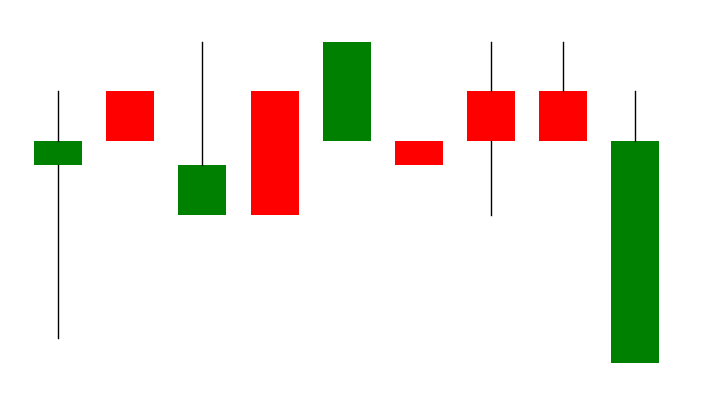

In [57]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
from io import BytesIO

def plot_normalized_candlestick(candle_vectors):
    """
    Função para plotar candles escalonados
    """
    fig, ax = plt.subplots(figsize=(len(candle_vectors), 5))  # Ajuste do tamanho do gráfico
    width = 0.2  # Largura dos candles
    spacing = 0.3  # Espaçamento entre candles

    # Loop pelos candles
    for i in range(len(candle_vectors)):
        candle_vector = candle_vectors[i]
        adjusted_open, adjusted_high, adjusted_low, adjusted_close = candle_vector
        
        x = i * spacing  # Posição do candle
        
        # Plotando sombras inferior e superior
        lower_shadow_min = min(adjusted_open, adjusted_close)
        ax.plot([x, x], [adjusted_low, lower_shadow_min], color='black', linewidth=1)
        
        upper_shadow_max = max(adjusted_open, adjusted_close)
        ax.plot([x, x], [upper_shadow_max, adjusted_high], color='black', linewidth=1)
        
        # Definir cor do candle (verde = alta, vermelho = baixa)
        color = 'green' if adjusted_close - adjusted_open >= 0 else 'red'
        
        # Caso onde o candle é um doji (abertura = fechamento)
        if np.round(adjusted_close - adjusted_open, 5) == 0:
            ax.plot(
                [x - width / 2, x + width / 2], 
                [adjusted_close, adjusted_close], 
                color='black', 
                linewidth=1
            )
        else:
            # Desenhar o corpo do candle
            rect = patches.Rectangle(
                (x - width / 2, min(adjusted_open, adjusted_close)), 
                width, 
                abs(adjusted_open - adjusted_close), 
                linewidth=0, 
                edgecolor='white', 
                facecolor=color
            )
            ax.add_patch(rect)
    
    # Ajustar os limites dos eixos
    margin = 0.1
    adjusted_max_high = max([candle[1] for candle in candle_vectors])
    adjusted_min_low = min([candle[2] for candle in candle_vectors])
    
    ax.set_xlim(-width, len(candle_vectors) * spacing)
    ax.set_ylim(adjusted_min_low - margin, adjusted_max_high + margin)
    
    # Remover grid, ticks e bordas
    ax.grid(False)
    ax.set_xticks([])  
    ax.set_yticks([]) 
    ax.yaxis.set_ticks_position('none')
    ax.yaxis.set_tick_params(labelleft=False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    
    # Salvar o gráfico em um buffer de memória (opcional para casos onde queira salvar a imagem)
    buf = BytesIO()
    plt.savefig(buf, format='png')
    buf.seek(0)
    fig.show()




plot_normalized_candlestick(scaled_values_rounded)


In [ ]:
# Exemplo de como chamar a função com dados escalonados
ohlc_data = np.array([
    [5.0121, 5.0124, 5.0114, 5.0122],
    [5.0124, 5.0124, 5.0122, 5.0122],
    [5.0119, 5.0126, 5.0119, 5.0121],
    [5.0124, 5.0124, 5.0119, 5.0119],
    [5.0122, 5.0126, 5.0122, 5.0126],
    [5.0122, 5.0122, 5.0121, 5.0121],
    [5.0124, 5.0126, 5.0119, 5.0122],
    [5.0124, 5.0126, 5.0122, 5.0122],
    [5.0113, 5.0124, 5.0113, 5.0122]
])


plot_normalized_candlestick(ohlc_data)